In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\User\Desktop\4_course\diploma_data\diploma_tables\table_fin.csv', sep=';', encoding='utf-8', on_bad_lines='skip')
print(df.head())


  StoryID    Название рассказа  Общая оценка  Счастье  Грусть  Отвращение  \
0    P306           «На краях»             6        0       0           1   
1    P381       «Чужая собака»             6        0       2           0   
2    P528   «История Клариссы»             3        0       0           1   
3    P530       «Анна и Мария»             6        0       1           0   
4    P539  «Куманьково болото»             9        2       1           1   

   Удивление  Гнев  Страх  
0          0     1      0  
1          1     0      0  
2          0     0      0  
3          2     0      0  
4          2     2      0  


In [2]:
df.columns = df.columns.str.strip()
df.rename(columns={'Название рассказа': 'title','Общая оценка': 'rating','Счастье': 'happiness','Грусть': 'sadness','Отвращение': 'disgust','Удивление': 'surprise','Гнев': 'anger','Страх': 'fear'}, inplace=True)
print(df.head())

  StoryID                title  rating  happiness  sadness  disgust  surprise  \
0    P306           «На краях»       6          0        0        1         0   
1    P381       «Чужая собака»       6          0        2        0         1   
2    P528   «История Клариссы»       3          0        0        1         0   
3    P530       «Анна и Мария»       6          0        1        0         2   
4    P539  «Куманьково болото»       9          2        1        1         2   

   anger  fear  
0      1     0  
1      0     0  
2      0     0  
3      0     0  
4      2     0  


In [3]:
df.rename(columns={
    'StoryID': 'story_id',
    'Название рассказа': 'title',
    'Общая оценка': 'rating',
    'Счастье': 'happiness',
    'Грусть': 'sadness',
    'Отвращение': 'disgust',
    'Удивление': 'surprise',
    'Гнев': 'anger',
    'Страх': 'fear'
}, inplace=True)
print(df.head())
print(df.columns.tolist())

  story_id                title  rating  happiness  sadness  disgust  \
0     P306           «На краях»       6          0        0        1   
1     P381       «Чужая собака»       6          0        2        0   
2     P528   «История Клариссы»       3          0        0        1   
3     P530       «Анна и Мария»       6          0        1        0   
4     P539  «Куманьково болото»       9          2        1        1   

   surprise  anger  fear  
0         0      1     0  
1         1      0     0  
2         0      0     0  
3         2      0     0  
4         2      2     0  
['story_id', 'title', 'rating', 'happiness', 'sadness', 'disgust', 'surprise', 'anger', 'fear']


In [4]:
import os

texts_folder = r'C:\Users\User\Desktop\data_txt'
all_files = os.listdir(texts_folder)
print(all_files[:10])

['A784_Кржижановский_Разговор_двух_разговоров.txt', 'P242_Куранов_Дни сентября.txt', 'P24_Аношкин_Однажды вечером.txt', 'P258_Тендряков_Письмо_,_запоздавшее_на_двадцать_лет.txt', 'P285_Шавкута_Коля_Большой_и_Коля_Маленький.txt', 'P301_Астафьев_Мною_рожденный.txt', 'P306_Солженицын_На_Краях.txt', 'P309_Искандер_Начало.txt', 'P311_Дубровский_Поражение_Геракла.txt', 'P318_Анчаров_Корабли.txt']


In [5]:
all_files = [f for f in all_files if f.endswith('.txt')]

In [6]:
def find_matching_file(title, files):
    title_clean = title.replace('«', '').replace('»', '').strip().lower()
    for f in files:
        if title_clean in f.lower():
            return f
    return None

In [7]:
def load_text(filename):
    if filename:
        path = os.path.join(texts_folder, filename)
        try:
            with open(path, 'r', encoding='utf-8') as file:
                return file.read()
        except:
            return None
    return None
df['filename'] = df['title'].apply(lambda x: find_matching_file(x, all_files))
df['text'] = df['filename'].apply(load_text)

In [8]:
print(df[['title', 'filename']].head(10))
print(df['text'].apply(lambda x: len(x) if x else 0).describe())

                  title filename
0            «На краях»     None
1        «Чужая собака»     None
2    «История Клариссы»     None
3        «Анна и Мария»     None
4   «Куманьково болото»     None
5     «Фотькина любовь»     None
6    «Подарки Пришвина»     None
7  «Бриллиантовая зима»     None
8   «Плата за мужество»     None
9   «Поражение Геракла»     None
count       736.000000
mean      22898.142663
std       33999.372882
min           0.000000
25%        6518.750000
50%       16158.000000
75%       29926.000000
max      596857.000000
Name: text, dtype: float64


In [9]:
import re

def clean_title(text):
    text = re.sub(r'[«»"\'.,!?;:()\[\]]', '', text)
    return text.strip().lower()

def find_matching_file(title, files):
    cleaned_title = clean_title(title)
    for f in files:
        if cleaned_title in clean_title(f):
            return f
    return None

In [10]:
df['filename'] = df['title'].apply(lambda x: find_matching_file(x, all_files))
df['text'] = df['filename'].apply(load_text)
print(df[['title', 'filename']].head(10))
print(df['text'].apply(lambda x: len(x) if x else 0).describe())

                  title filename
0            «На краях»     None
1        «Чужая собака»     None
2    «История Клариссы»     None
3        «Анна и Мария»     None
4   «Куманьково болото»     None
5     «Фотькина любовь»     None
6    «Подарки Пришвина»     None
7  «Бриллиантовая зима»     None
8   «Плата за мужество»     None
9   «Поражение Геракла»     None
count       736.000000
mean      23172.565217
std       34188.574873
min           0.000000
25%        6756.000000
50%       16344.500000
75%       29968.500000
max      596857.000000
Name: text, dtype: float64


In [11]:
import difflib

def find_closest_match(title, files):
    # Очищаем заголовок и преобразуем его в нижний регистр
    cleaned_title = clean_title(title)
    # Сравниваем заголовок с каждым файлом в папке, ищем наиболее похожее название
    matches = difflib.get_close_matches(cleaned_title, files, n=1, cutoff=0.6)  # n=1 для 1 наиболее близкого совпадения, cutoff — порог
    return matches[0] if matches else None

In [12]:
df['filename'] = df['title'].apply(lambda x: find_closest_match(x, all_files))
df['text'] = df['filename'].apply(load_text)

In [13]:
print(df[['title', 'filename']].head(10))
print(df['text'].apply(lambda x: len(x) if x else 0).describe())

                  title                             filename
0            «На краях»                                 None
1        «Чужая собака»                                 None
2    «История Клариссы»                                 None
3        «Анна и Мария»                                 None
4   «Куманьково болото»  P539_Пьянкова_Куманьково_болото.txt
5     «Фотькина любовь»                                 None
6    «Подарки Пришвина»                                 None
7  «Бриллиантовая зима»                                 None
8   «Плата за мужество»                                 None
9   «Поражение Геракла»                                 None
count       736.000000
mean       5194.388587
std       17420.814043
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      312488.000000
Name: text, dtype: float64


In [14]:
def find_closest_match(title, files, cutoff=0.5):  # Понижаем порог похожести
    cleaned_title = clean_title(title)
    matches = difflib.get_close_matches(cleaned_title, files, n=1, cutoff=cutoff)
    return matches[0] if matches else None

In [15]:
df['filename'] = df['title'].apply(lambda x: find_closest_match(x, all_files, cutoff=0.5))
df['text'] = df['filename'].apply(load_text)

In [16]:
print(df[['title', 'filename']].head(10))
print(df['text'].apply(lambda x: len(x) if x else 0).describe())

                  title                                filename
0            «На краях»                                    None
1        «Чужая собака»                                    None
2    «История Клариссы»                                    None
3        «Анна и Мария»                                    None
4   «Куманьково болото»     P539_Пьянкова_Куманьково_болото.txt
5     «Фотькина любовь»        P379_Шушарин_Фотькина_любовь.txt
6    «Подарки Пришвина»          P356_Яшин_Подарки_Пришвина.txt
7  «Бриллиантовая зима»  P486_Ольшанский_Бриллиантовая_зима.txt
8   «Плата за мужество»      P366_Смирнов_Плата_за_мужество.txt
9   «Поражение Геракла»   P311_Дубровский_Поражение_Геракла.txt
count       736.000000
mean      14481.210598
std       32958.143144
min           0.000000
25%           0.000000
50%           0.000000
75%       20169.250000
max      596857.000000
Name: text, dtype: float64


In [17]:
def find_closest_match(title, files, cutoff=0.4):
    cleaned_title = clean_title(title)
    matches = difflib.get_close_matches(cleaned_title, files, n=1, cutoff=cutoff)
    return matches[0] if matches else None

df['filename'] = df['title'].apply(lambda x: find_closest_match(x, all_files, cutoff=0.4))
df['text'] = df['filename'].apply(load_text)

In [18]:
print(df[['title', 'filename']].head(10))
print(df['text'].apply(lambda x: len(x) if x else 0).describe())


                  title                                filename
0            «На краях»                    Панова Вера_Валя.txt
1        «Чужая собака»         P381_Насущенко_Чужая_собака.txt
2    «История Клариссы»  P528_Петрушевская_История_Клариссы.txt
3        «Анна и Мария»                  Ганина_В гастролях.txt
4   «Куманьково болото»     P539_Пьянкова_Куманьково_болото.txt
5     «Фотькина любовь»        P379_Шушарин_Фотькина_любовь.txt
6    «Подарки Пришвина»          P356_Яшин_Подарки_Пришвина.txt
7  «Бриллиантовая зима»  P486_Ольшанский_Бриллиантовая_зима.txt
8   «Плата за мужество»      P366_Смирнов_Плата_за_мужество.txt
9   «Поражение Геракла»   P311_Дубровский_Поражение_Геракла.txt
count       736.000000
mean      22611.811141
std       34986.746060
min           0.000000
25%           0.000000
50%       14759.500000
75%       30918.750000
max      596857.000000
Name: text, dtype: float64


In [19]:
missing_count = df['filename'].isnull().sum()
print(f"Не найдено файлов для {missing_count} рассказов из {len(df)}")

Не найдено файлов для 193 рассказов из 736


In [20]:
no_match_df = df[df['filename'].isnull()]
no_match_df[['story_id', 'title']].to_csv('unmatched_titles.csv', index=False)

In [21]:
df.to_csv('matched_texts.csv', index=False)

In [22]:
for i, row in df.iterrows():
    if row['filename'] is not None and clean_title(row['title']) not in clean_title(row['filename']):
        print(f"{row['title']} --> {row['filename']}")

«На краях» --> Панова Вера_Валя.txt
«Чужая собака» --> P381_Насущенко_Чужая_собака.txt
«История Клариссы» --> P528_Петрушевская_История_Клариссы.txt
«Анна и Мария» --> Ганина_В гастролях.txt
«Куманьково болото» --> P539_Пьянкова_Куманьково_болото.txt
«Фотькина любовь» --> P379_Шушарин_Фотькина_любовь.txt
«Подарки Пришвина» --> P356_Яшин_Подарки_Пришвина.txt
«Бриллиантовая зима» --> P486_Ольшанский_Бриллиантовая_зима.txt
«Плата за мужество» --> P366_Смирнов_Плата_за_мужество.txt
«Поражение Геракла» --> P311_Дубровский_Поражение_Геракла.txt
«Только одна смерть» --> Р332_Домбровский_Только_одна_смерть.txt
«Невский проспект» --> P403_Ганичев_Невский_проспект.txt
«Любовь к Паганини» --> Р411_Медведев_Любовь_к_Паганини.txt
«Новый район» --> P529_Петрушевская_Новый_район.txt
«Рассказ о трех хулиганах» --> P497_Самохин_Рассказ_о_трех_хулиганах.txt
«Книги мёртвых» --> Р448_Геворкян_Книги_мёртвых.txt
«Гибель „Вирджинии“» --> Р611_Баковиков_Гибель_Вирджинии.txt
«О свойствах льда» --> Р389_Корабел

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
texts = df['text'].fillna('')
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(texts)
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)
similarities = list(enumerate(cos_sim[0]))
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
for idx, score in similarities[1:6]:  # [1:] чтобы пропустить сам рассказ
    print(f"Похожий рассказ: {df.iloc[idx]['title']} (сходство: {score:.2f})")

Похожий рассказ: «Каменный венок» (сходство: 0.62)
Похожий рассказ: «Черная болезнь» (сходство: 0.60)
Похожий рассказ: Фригийские васильки (сходство: 0.59)
Похожий рассказ: Трест имени Мопассана (сходство: 0.58)
Похожий рассказ: Эдипов комплекс (сходство: 0.57)


In [24]:
def recommend_similar(story_id, top_n=5, emotion_filter=None, min_rating=0):
    # Получаем индекс нужного рассказа
    idx = df[df['StoryID'] == story_id].index[0]

    # Считаем косинусную близость
    cos_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

    # Добавим сходство в датафрейм
    df['similarity'] = cos_sim

    # Пропустим сам рассказ
    filtered = df[df['StoryID'] != story_id]

    # Фильтрация по рейтингу
    if min_rating > 0:
        filtered = filtered[filtered['rating'] >= min_rating]

    # Фильтрация по эмоции
    if emotion_filter:
        for emotion, threshold in emotion_filter.items():
            filtered = filtered[filtered[emotion] >= threshold]

    # Сортируем по схожести и выводим
    result = filtered.sort_values(by='similarity', ascending=False).head(top_n)

    return result[['story_id', 'title', 'rating', 'similarity']]


In [25]:
print(df.columns.tolist())

['story_id', 'title', 'rating', 'happiness', 'sadness', 'disgust', 'surprise', 'anger', 'fear', 'filename', 'text']


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def recommend_similar(story_id, top_n=5, emotion_filter=None, min_rating=0):
    """
    Рекомендует рассказы, похожие на указанный по story_id, с возможностью фильтрации по эмоциям и рейтингу.

    :param story_id: ID рассказа, для которого ищутся похожие.
    :param top_n: Количество рекомендаций.
    :param emotion_filter: Словарь вида {'sadness': 1, 'anger': 1}, где значения — минимальные пороги.
    :param min_rating: Минимальный рейтинг (например, 6).
    """
    if 'story_id' not in df.columns:
        raise KeyError("'story_id' не найдена в колонках DataFrame")

    if story_id not in df['story_id'].values:
        raise ValueError(f"Рассказ с ID {story_id} не найден в данных")

    idx = df[df['story_id'] == story_id].index[0]

    cos_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

    sim_df = df.copy()
    sim_df['similarity'] = cos_sim

    sim_df = sim_df[sim_df['story_id'] != story_id]

    if emotion_filter:
        for emotion, threshold in emotion_filter.items():
            if emotion in sim_df.columns:
                sim_df = sim_df[sim_df[emotion] >= threshold]

    sim_df = sim_df[sim_df['rating'] >= min_rating]

    sim_df = sim_df.sort_values(by='similarity', ascending=False)
    for _, row in sim_df.head(top_n).iterrows():
        print(f"Похожий рассказ: {row['title']} (сходство: {row['similarity']:.2f})")


In [28]:
recommend_similar(story_id='P381', top_n=5, emotion_filter={'sadness': 1}, min_rating=6)

Похожий рассказ: Иван Кузьмич (сходство: 0.26)
Похожий рассказ: «Каменный венок» (сходство: 0.26)
Похожий рассказ: Судьба человека (сходство: 0.26)
Похожий рассказ: «Черная болезнь» (сходство: 0.25)
Похожий рассказ: «Что-то зазвенело» (сходство: 0.25)


C:\Users\User\PycharmProjects\boolkrecommender\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\PycharmProjects\boolkrecommender\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


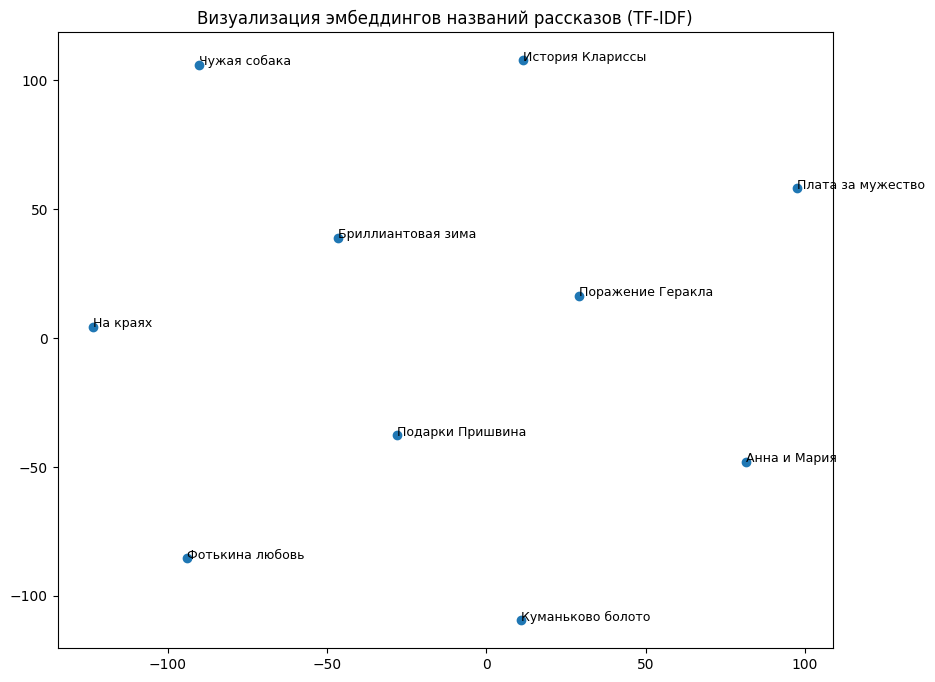

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

df = pd.DataFrame({
    'title': ['На краях', 'Чужая собака', 'История Клариссы', 'Анна и Мария', 'Куманьково болото',
              'Фотькина любовь', 'Подарки Пришвина', 'Бриллиантовая зима', 'Плата за мужество', 'Поражение Геракла']
})

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df['title'])

tsne = TSNE(n_components=2, perplexity=9, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

df['x'] = tsne_results[:, 0]
df['y'] = tsne_results[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(df['x'], df['y'])

for i, row in df.iterrows():
    plt.text(row['x'], row['y'], row['title'], fontsize=9)

plt.title('Визуализация эмбеддингов названий рассказов (TF-IDF)')
plt.show()


In [28]:
print(df.columns.tolist())


['title', 'x', 'y']


In [29]:
import pandas as pd
df = pd.read_csv(r'C:\Users\User\Desktop\4_course\diploma_data\diploma_tables\table_fin.csv', sep=';', encoding='utf-8', on_bad_lines='skip')
print(df.head())

  StoryID    Название рассказа  Общая оценка  Счастье  Грусть  Отвращение  \
0    P306           «На краях»             6        0       0           1   
1    P381       «Чужая собака»             6        0       2           0   
2    P528   «История Клариссы»             3        0       0           1   
3    P530       «Анна и Мария»             6        0       1           0   
4    P539  «Куманьково болото»             9        2       1           1   

   Удивление  Гнев  Страх  
0          0     1      0  
1          1     0      0  
2          0     0      0  
3          2     0      0  
4          2     2      0  


In [30]:
df.columns = df.columns.str.strip()
df.rename(columns={'Название рассказа': 'title','Общая оценка': 'rating','Счастье': 'happiness','Грусть': 'sadness','Отвращение': 'disgust','Удивление': 'surprise','Гнев': 'anger','Страх': 'fear'}, inplace=True)
print(df.head())

  StoryID                title  rating  happiness  sadness  disgust  surprise  \
0    P306           «На краях»       6          0        0        1         0   
1    P381       «Чужая собака»       6          0        2        0         1   
2    P528   «История Клариссы»       3          0        0        1         0   
3    P530       «Анна и Мария»       6          0        1        0         2   
4    P539  «Куманьково болото»       9          2        1        1         2   

   anger  fear  
0      1     0  
1      0     0  
2      0     0  
3      0     0  
4      2     0  


In [31]:
df.rename(columns={
    'StoryID': 'story_id',
    'Название рассказа': 'title',
    'Общая оценка': 'rating',
    'Счастье': 'happiness',
    'Грусть': 'sadness',
    'Отвращение': 'disgust',
    'Удивление': 'surprise',
    'Гнев': 'anger',
    'Страх': 'fear'
}, inplace=True)
print(df.head())
print(df.columns.tolist())

  story_id                title  rating  happiness  sadness  disgust  \
0     P306           «На краях»       6          0        0        1   
1     P381       «Чужая собака»       6          0        2        0   
2     P528   «История Клариссы»       3          0        0        1   
3     P530       «Анна и Мария»       6          0        1        0   
4     P539  «Куманьково болото»       9          2        1        1   

   surprise  anger  fear  
0         0      1     0  
1         1      0     0  
2         0      0     0  
3         2      0     0  
4         2      2     0  
['story_id', 'title', 'rating', 'happiness', 'sadness', 'disgust', 'surprise', 'anger', 'fear']


In [32]:
print(df.columns)

Index(['story_id', 'title', 'rating', 'happiness', 'sadness', 'disgust',
       'surprise', 'anger', 'fear'],
      dtype='object')


In [33]:
import os
from difflib import get_close_matches

folder_path = r"C:\Users\User\Desktop\data_txt"
file_list = os.listdir(folder_path)

def find_best_match(title):
    matches = get_close_matches(title.replace(" ", "_"), file_list, n=1, cutoff=0.4)
    return matches[0] if matches else None

def read_text_from_best_match(title):
    match = find_best_match(title)
    if match:
        try:
            with open(os.path.join(folder_path, match), 'r', encoding='utf-8') as f:
                return f.read()
        except Exception as e:
            print(f"Ошибка при чтении файла {match}: {e}")
    return None

df['text'] = df['title'].apply(read_text_from_best_match)

In [34]:
print(df.columns)

Index(['story_id', 'title', 'rating', 'happiness', 'sadness', 'disgust',
       'surprise', 'anger', 'fear', 'text'],
      dtype='object')


In [35]:
print(df[['title', 'text']].head())



                 title                                               text
0           «На краях»                                               None
1       «Чужая собака»  В «черную субботу» Иван Дмитриевич Коротков от...
2   «История Клариссы»  История Клариссы в своей начальной стадии как ...
3       «Анна и Мария»  Жил-был человек, который охотно помогал всем —...
4  «Куманьково болото»  Почему Куманьково? Да потому, знать, что вокру...


In [36]:
print(df['text'].isnull().sum())

180


In [39]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

texts = ["Пример текста для эмбеддинга 1", "Пример текста для эмбеддинга 2"]

inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state  # Эмбеддинги из последнего слоя


embeddings = embeddings.mean(dim=1)

print(embeddings)


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum lengt

tensor([[ 0.9509, -0.6667, -0.3431,  ...,  0.9917,  0.6518,  0.0169],
        [ 0.9137, -0.6813, -0.2084,  ...,  1.0086,  0.7393,  0.0504]])


In [40]:
embeddings = embeddings.mean(dim=1)  # Усреднение по всем токенам
print(embeddings)

tensor([-0.0069, -0.0060])


In [37]:
texts = df['text'].tolist()
print(df['text'])


0                                                   None
1      В «черную субботу» Иван Дмитриевич Коротков от...
2      История Клариссы в своей начальной стадии как ...
3      Жил-был человек, который охотно помогал всем —...
4      Почему Куманьково? Да потому, знать, что вокру...
                             ...                        
731    Молодцеватый, несмотря на свои пятьдесят семь ...
732    Незадолго до конца своей смены Степан Игнатови...
733    1\n\nОн лежит на скамье в простенке между двум...
734                                                 None
735    Петров мчался по горячей улице. Его слегка пот...
Name: text, Length: 736, dtype: object


In [38]:
df = df.dropna(subset=['text'])
df['text'] = df['text'].astype(str)
texts = df['text'].tolist()

In [39]:
print(df[['story_id', 'title', 'rating', 'happiness', 'sadness', 'disgust',
       'surprise', 'anger', 'fear', 'text']].head())

  story_id                title  rating  happiness  sadness  disgust  \
1     P381       «Чужая собака»       6          0        2        0   
2     P528   «История Клариссы»       3          0        0        1   
3     P530       «Анна и Мария»       6          0        1        0   
4     P539  «Куманьково болото»       9          2        1        1   
5     P379    «Фотькина любовь»       7          0        1        0   

   surprise  anger  fear                                               text  
1         1      0     0  В «черную субботу» Иван Дмитриевич Коротков от...  
2         0      0     0  История Клариссы в своей начальной стадии как ...  
3         2      0     0  Жил-был человек, который охотно помогал всем —...  
4         2      2     0  Почему Куманьково? Да потому, знать, что вокру...  
5         2      0     1  По северной дороге, от Вологды к Кирову, шел с...  


In [49]:
df.to_csv("df_clean.csv", index=False, encoding="utf-8")

In [47]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm


tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/ruBert-base")
model = AutoModel.from_pretrained("sberbank-ai/ruBert-base")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


texts = df['text'].dropna().tolist()


def get_bert_embeddings(texts, batch_size=16):
    embeddings = []
    dataloader = DataLoader(texts, batch_size=batch_size)

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Генерация эмбеддингов"):
            inputs = tokenizer(
                list(batch),
                padding=True,
                truncation=True,
                max_length=512,
                return_tensors="pt"
            )
            inputs = {k: v.to(device) for k, v in inputs.items()}
            outputs = model(**inputs)
            cls_embeddings = outputs.last_hidden_state[:, 0, :]  # CLS-токен
            embeddings.append(cls_embeddings.cpu().numpy())

    return np.vstack(embeddings)


bert_embeddings = get_bert_embeddings(texts, batch_size=16)

# Присваиваем обратно к df (важно — индексы должны совпасть!)
df_clean = df.dropna(subset=["text"]).copy()
df_clean["bert_vector"] = list(bert_embeddings)

df_clean.to_сsv("df_with_bert.csv")


RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
module 'torch' has no attribute 'compiler'

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=300)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['text'].fillna("")).toarray()

emotion_columns = ['happiness', 'sadness', 'disgust','surprise', 'anger', 'fear']
emotions = df_clean[emotion_columns].fillna(0).values

ratings = df_clean['rating'].fillna(0).values.reshape(-1, 1)

bert_vecs = np.vstack(df_clean['bert_vector'])

hybrid_vectors = np.hstack([tfidf_matrix, bert_vecs, emotions, ratings])
scaler = StandardScaler()
hybrid_vectors_scaled = scaler.fit_transform(hybrid_vectors)

df_clean['hybrid_vector'] = list(hybrid_vectors_scaled)


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def hybrid_recommend(df, query_index, top_n=5):
    """
    Находит top_n похожих рассказов на основе гибридного признакового вектора:
    TF-IDF + BERT + эмоции + рейтинг.

    :param df: DataFrame, содержащий колонку 'hybrid_vector'
    :param query_index: индекс рассказа, по которому ищем похожие
    :param top_n: число рекомендаций
    :return: DataFrame с полями ['title', 'author', 'rating', ...]
    """
    if 'hybrid_vector' not in df.columns:
        raise ValueError("Отсутствует колонка 'hybrid_vector'. Объедините векторы перед вызовом функции.")

    query_vec = np.array(df.iloc[query_index]['hybrid_vector']).reshape(1, -1)
    all_vecs = np.vstack(df['hybrid_vector'].values)

    similarities = cosine_similarity(query_vec, all_vecs).flatten()
    similarities[query_index] = -1  # исключаем сам рассказ

    top_indices = similarities.argsort()[::-1][:top_n]
    print("Top indices:", top_indices)
    print(df.iloc[top_indices][['title', 'rating']])

    return df.iloc[top_indices][['title', 'rating', 'happiness', 'sadness', 'text']]


In [47]:
query_vector = np.array(df_clean.iloc[0]['hybrid_vector']).reshape(1, -1)
all_vectors = np.vstack(df_clean['hybrid_vector'])
sims = cosine_similarity(query_vector, all_vectors).flatten()
print(sims.argsort()[::-1][:10])  # должны быть индексы с максимальной близостью


[  0 278 110 245 218 362 337 255 415 122]


In [48]:
result = hybrid_recommend(df_clean, query_index=0, top_n=5)
print(result)


Top indices: [278 110 245 218 362]
                      title  rating
347            Простите нас      10
124    Война с одуванчиками       8
292     Первое произведение       6
247          Выстрел с Невы      10
467  Вторая берёзовая аллея       5
                      title  rating  happiness  sadness  \
347            Простите нас      10          0        2   
124    Война с одуванчиками       8          0        2   
292     Первое произведение       6          0        0   
247          Выстрел с Невы      10          1        0   
467  Вторая берёзовая аллея       5          1        0   

                                                  text  
347  Юрий Бондарев. \n\n«Простите нас!»\n\n\n\nЮжны...  
124  О том, что в Москве умер его брат, Павел Алекс...  
292  АЛЕКСАНДР ВОРОНСКИЙ\n\n\n\nПЕРВОЕ ПРОИЗВЕДЕНИЕ...  
247  Б. Лавренев\n\nВЫСТРЕЛ С НЕВЫ\n\nРассказ\n\n23...  
467  Третьего июля вечером пенсионер Аникеев узнал ...  


In [61]:
import pandas as pd
import os


df_unlabeled = pd.read_csv(r"C:\Users\User\Desktop\4_course\diploma_data\diploma_tables\unlabeled_stories.csv", sep=";", encoding="utf-8")

text_folder = r"C:\Users\User\Desktop\4_course\diploma_data\texts_unlabeled"

def load_story_text_by_partial_id(story_id, folder):
    for fname in os.listdir(folder):
        if fname.startswith(f"{story_id}_") and fname.endswith(".txt"):
            path = os.path.join(folder, fname)
            try:
                with open(path, encoding="utf-8") as f:
                    return f.read()
            except Exception as e:
                print(f"Ошибка при чтении {fname}: {e}")
                return None
    return None



In [62]:
df_unlabeled['text'] = df_unlabeled['story_id'].apply(lambda sid: load_story_text_by_partial_id(sid, text_folder))


In [64]:
df_unlabeled = df_unlabeled.dropna(subset=['text'])

In [67]:
df_unlabeled.to_excel("df_unlabeled_with_texts.xlsx", index=False)

In [68]:
import torch
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm

# Загрузка модели и токенизатора
tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/ruBert-base")
model = AutoModel.from_pretrained("sberbank-ai/ruBert-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


texts = df_unlabeled['text'].fillna("").tolist()


def get_bert_embeddings(texts, batch_size=16):
    embeddings = []
    dataloader = DataLoader(texts, batch_size=batch_size)

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Генерация эмбеддингов"):
            inputs = tokenizer(
                list(batch),
                padding=True,
                truncation=True,
                max_length=512,
                return_tensors="pt"
            )
            inputs = {k: v.to(device) for k, v in inputs.items()}
            outputs = model(**inputs)
            cls_embeddings = outputs.last_hidden_state[:, 0, :]
            embeddings.append(cls_embeddings.cpu().numpy())

    return np.vstack(embeddings)

# Генерация и сохранение эмбеддингов
bert_embeddings = get_bert_embeddings(texts, batch_size=16)
df_unlabeled['bert_vector'] = list(bert_embeddings)


Генерация эмбеддингов: 100%|██████████| 63/63 [14:20<00:00, 13.65s/it]


In [69]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_from_labeled_by_bert(query_vector, labeled_vectors, labeled_df, top_n=5):
    """
    Возвращает top_n самых похожих рассказов из df_labeled по вектору BERT.

    :param query_vector: вектор рассказа из df_unlabeled
    :param labeled_vectors: np.ndarray — векторы из df_labeled
    :param labeled_df: DataFrame с текстами и метками
    :param top_n: количество рекомендаций
    """
    sims = cosine_similarity([query_vector], labeled_vectors).flatten()
    top_indices = sims.argsort()[::-1][:top_n]
    return labeled_df.iloc[top_indices][['story_id', 'title', 'rating', 'happiness', 'text']]


In [71]:
df.head()

,story_id,title,rating,happiness,sadness,disgust,surprise,anger,fear,text
1,P381,«Чужая собака»,6,0,2,0,1,0,0,В «черную субботу» Иван Дмитриевич Коротков от...
2,P528,«История Клариссы»,3,0,0,1,0,0,0,История Клариссы в своей начальной стадии как ...
3,P530,«Анна и Мария»,6,0,1,0,2,0,0,"Жил-был человек, который охотно помогал всем —..."
4,P539,«Куманьково болото»,9,2,1,1,2,2,0,"Почему Куманьково? Да потому, знать, что вокру..."
5,P379,«Фотькина любовь»,7,0,1,0,2,0,1,"По северной дороге, от Вологды к Кирову, шел с..."


In [72]:
df_clean.head()

,story_id,title,rating,happiness,sadness,disgust,surprise,anger,fear,text,bert_vector,hybrid_vector
1,P381,«Чужая собака»,6,0,2,0,1,0,0,В «черную субботу» Иван Дмитриевич Коротков от...,"[0.3698485, 0.162148, -0.030727029, 0.70308733...","[-0.7603814725976583, -0.7347497008627079, 0.6..."
2,P528,«История Клариссы»,3,0,0,1,0,0,0,История Клариссы в своей начальной стадии как ...,"[0.7553919, 0.30680245, -0.10272001, 0.7024342...","[1.0356038760172048, -0.7347497008627079, -1.2..."
3,P530,«Анна и Мария»,6,0,1,0,2,0,0,"Жил-был человек, который охотно помогал всем —...","[0.5348565, 0.06626424, 0.0503989, 0.5905434, ...","[0.11757162152983269, -0.7347497008627079, 4.4..."
4,P539,«Куманьково болото»,9,2,1,1,2,2,0,"Почему Куманьково? Да потому, знать, что вокру...","[0.36443087, 0.73728085, 0.058436267, 0.881698...","[-0.15472767331447007, -0.5540558031698523, 0...."
5,P379,«Фотькина любовь»,7,0,1,0,2,0,1,"По северной дороге, от Вологды к Кирову, шел с...","[0.16076338, 0.12178066, -0.05384083, 0.477803...","[0.09917843648803289, -0.7347497008627079, -0...."


In [73]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_from_labeled_by_bert(query_vector, labeled_vectors, labeled_df, top_n=5):
    """
    Возвращает top_n самых похожих рассказов из df_clean по вектору BERT.

    :param query_vector: np.array — вектор из df_unlabeled
    :param labeled_vectors: np.ndarray — массив векторов из df_clean
    :param labeled_df: DataFrame df_clean
    :param top_n: сколько рекомендаций вернуть
    :return: DataFrame с рекомендациями
    """
    sims = cosine_similarity([query_vector], labeled_vectors).flatten()
    top_indices = sims.argsort()[::-1][:top_n]
    return labeled_df.iloc[top_indices][['story_id', 'title', 'rating', 'happiness', 'text']]


In [74]:
# Массив векторов из df_clean
labeled_vectors = np.vstack(df_clean['bert_vector'])

# Один рассказ из df_unlabeled
query_vector = np.array(df_unlabeled.iloc[0]['bert_vector'])

# Получение рекомендаций
recommendations = recommend_from_labeled_by_bert(query_vector, labeled_vectors, df_clean, top_n=5)
print(recommendations)


    story_id                         title  rating  happiness  \
247       P7                Выстрел с Невы      10          1   
441     Р169            В детских ботинках       5          0   
431       P9  Правила совместного плавания       4          0   
61      Р604       «Сады пятнистого оленя»       5          0   
145     Р400      При всех обстоятельствах       8          0   

                                                  text  
247  Б. Лавренев\n\nВЫСТРЕЛ С НЕВЫ\n\nРассказ\n\n23...  
441  СОФЬЯ ВИНОГРАДСКАЯ\n\nВ ДЕТСКИХ БОТИНКАХ\n\n\n...  
431  Правила совместного плавания\n\n\n\n1\n\n— Это...  
61   Мы поднимались на сопку напрямик, по садам, бе...  
145  1\n\nВ половине второго привезли наконец оркес...  


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

target_cols = ['rating', 'happiness', 'sadness', 'disgust', 'surprise', 'anger', 'fear']

df_train = df_clean.dropna(subset=target_cols + ['bert_vector'])

X = np.vstack(df_train['bert_vector'])
y = df_train[target_cols].values



In [76]:
model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42))
model.fit(X, y)

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=5,
                                                         random_state=42))

In [77]:
X_unlabeled = np.vstack(df_unlabeled['bert_vector'])
y_pred = model.predict(X_unlabeled)

for i, col in enumerate(target_cols):
    df_unlabeled[col] = y_pred[:, i]

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# 1. TF-IDF на всех текстах
tfidf = TfidfVectorizer(max_features=300)
tfidf_matrix_unlabeled = tfidf.fit_transform(df_unlabeled['text'].fillna("")).toarray()

# 2. Эмоции и рейтинг
emotion_cols = ['happiness', 'sadness', 'disgust', 'surprise', 'anger', 'fear']
emotions = df_unlabeled[emotion_cols].fillna(0).values
ratings = df_unlabeled['rating'].fillna(0).values.reshape(-1, 1)

# 3. BERT
bert = np.vstack(df_unlabeled['bert_vector'])

# 4. Объединение
hybrid_unlabeled = np.hstack([tfidf_matrix_unlabeled, bert, emotions, ratings])

# 5. Нормализация
scaler = StandardScaler()
hybrid_unlabeled_scaled = scaler.fit_transform(hybrid_unlabeled)

# Сохраняем в датафрейм
df_unlabeled['hybrid_vector'] = list(hybrid_unlabeled_scaled)


In [79]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_from_clean_for_unlabeled_by_hybrid(df_unlabeled, df_clean, top_n=5):
    """
    Для каждого рассказа из df_unlabeled находит top_n похожих рассказов из df_clean по hybrid_vector.
    """
    labeled_vectors = np.vstack(df_clean['hybrid_vector'])
    results = []

    for idx, row in df_unlabeled.iterrows():
        query_vector = np.array(row['hybrid_vector']).reshape(1, -1)
        similarities = cosine_similarity(query_vector, labeled_vectors).flatten()
        top_indices = similarities.argsort()[::-1][:top_n]

        top_matches = df_clean.iloc[top_indices][['story_id', 'title', 'rating', 'happiness']]
        top_matches['source_story_id'] = row['story_id']
        top_matches['source_title'] = row['title']
        results.append(top_matches)

    return pd.concat(results, ignore_index=True)


In [80]:
sample_result = recommend_from_clean_for_unlabeled_by_hybrid(df_unlabeled.iloc[:1], df_clean, top_n=5)
print(sample_result)

  story_id                         title  rating  happiness source_story_id  \
0     Р507              «Двадцать минут»      10          1            A120   
1       P9  Правила совместного плавания       4          0            A120   
2       P7                Выстрел с Невы      10          1            A120   
3     Р169            В детских ботинках       5          0            A120   
4      Р91            Конец Ибрагим-бека       7          1            A120   

  source_title  
0     Мятежник  
1     Мятежник  
2     Мятежник  
3     Мятежник  
4     Мятежник  


In [81]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def recommend_unlabeled_for_clean(df_clean, df_unlabeled, top_n=5):
    """
    Для каждого рассказа из df_clean находит top_n похожих рассказов из df_unlabeled по hybrid_vector.
    """
    unlabeled_vectors = np.vstack(df_unlabeled['hybrid_vector'])
    results = []

    for idx, row in df_clean.iterrows():
        query_vector = np.array(row['hybrid_vector']).reshape(1, -1)
        similarities = cosine_similarity(query_vector, unlabeled_vectors).flatten()

        top_indices = similarities.argsort()[::-1][:top_n]
        top_matches = df_unlabeled.iloc[top_indices][['story_id', 'title']].copy()
        top_matches['source_story_id'] = row['story_id']
        top_matches['source_title'] = row['title']
        results.append(top_matches)

    return pd.concat(results, ignore_index=True)


In [88]:
recommend_unlabeled_for_clean(df_clean.iloc[355:356], df_unlabeled, top_n=5)


,story_id,title,source_story_id,source_title
0,P184,Настя,P179,Музыка на вокзале
1,Р314,Рассказ о пользе молока,P179,Музыка на вокзале
2,S119,Зеленя,P179,Музыка на вокзале
3,P400,При всех обстоятельствах,P179,Музыка на вокзале
4,E093,Высокий берег,P179,Музыка на вокзале


In [89]:
def find_best_match_by_emotion(df_clean, emotion_query: dict, min_rating=0):
    """
    Находит рассказ в df_clean, максимально близкий к заданным эмоциям и рейтингу.
    emotion_query: {'sadness': 2, 'fear': 2}
    """
    df_filtered = df_clean[df_clean['rating'] >= min_rating].copy()

    for emo, target in emotion_query.items():
        df_filtered[emo + '_diff'] = (df_filtered[emo] - target).abs()

    # Суммарная "дистанция" по эмоциям
    emotion_diff_cols = [col for col in df_filtered.columns if col.endswith('_diff')]
    df_filtered['emotion_score'] = df_filtered[emotion_diff_cols].sum(axis=1)

    best_match = df_filtered.sort_values('emotion_score').iloc[0]
    return best_match


In [90]:
def recommend_unlabeled_from_clean_story(clean_story, df_unlabeled, top_n=5):
    query_vector = np.array(clean_story['hybrid_vector']).reshape(1, -1)
    unlabeled_vectors = np.vstack(df_unlabeled['hybrid_vector'])

    sims = cosine_similarity(query_vector, unlabeled_vectors).flatten()
    top_indices = sims.argsort()[::-1][:top_n]
    return df_unlabeled.iloc[top_indices][['story_id', 'title', 'text']]


In [113]:
query = {'happiness':2, 'surprise': 0.9, 'rating': 1}

# 1. Найти опорный рассказ
matched_story = find_best_match_by_emotion(df_clean, query, min_rating=7)
print("Подобран рассказ:", matched_story['story_id'], matched_story['title'])

# 2. Получить рекомендации из df_unlabeled
recommendations = recommend_unlabeled_from_clean_story(matched_story, df_unlabeled, top_n=5)
print(recommendations)

Подобран рассказ: Р472 «Волшебный хмель»
    story_id              title  \
872     Р472    Волшебный хмель   
284     P271       Сыновний суд   
563     S129           Складень   
160     P122             Ошибка   
608     S176  Кровобор-богатырь   

                                                  text  
872  В Забаре от старого барского дома, который сто...  
284  Ким Анатолий Андреевич\n\nСыновний суд\n\n1\n\...  
563  Как две черные, неисчислимые и вражеские рати,...  
160  Валентин ОВЕЧКИН\n\nОШИБКА\n\nСилантия Федоров...  
608  Кровобор-Богатырь трижды подымается. Он трижды...  


In [114]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/ruBert-base")
model = AutoModel.from_pretrained("sberbank-ai/ruBert-base")
model.eval()

def encode_query(text):
    """Получает BERT-вектор CLS для текстового запроса"""
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()


In [115]:
def find_best_semantic_story(df_clean, query_text, emotion_filter=None, min_rating=0):

    query_vector = encode_query(query_text)

    df_filtered = df_clean.copy()
    if min_rating > 0:
        df_filtered = df_filtered[df_filtered['rating'] >= min_rating]
    if emotion_filter:
        for emo, target in emotion_filter.items():
            df_filtered = df_filtered[df_filtered[emo] >= target]

    vectors = np.vstack(df_filtered['bert_vector'])
    sims = cosine_similarity([query_vector], vectors).flatten()
    best_idx = sims.argmax()
    return df_filtered.iloc[best_idx]


In [116]:
def recommend_unlabeled_from_story(story_row, df_unlabeled, top_n=5):
    """
    Возвращает 2 набора рекомендаций из df_unlabeled:
    1) по bert_vector (semantic), 2) по hybrid_vector
    """
    results = {}

    # SEMANTIC
    story_bert = np.array(story_row['bert_vector']).reshape(1, -1)
    vectors_bert = np.vstack(df_unlabeled['bert_vector'])
    sims_bert = cosine_similarity(story_bert, vectors_bert).flatten()
    top_bert_idx = sims_bert.argsort()[::-1][:top_n]
    results['semantic'] = df_unlabeled.iloc[top_bert_idx][['story_id', 'title', 'text']]

    # HYBRID
    story_hybrid = np.array(story_row['hybrid_vector']).reshape(1, -1)
    vectors_hybrid = np.vstack(df_unlabeled['hybrid_vector'])
    sims_hybrid = cosine_similarity(story_hybrid, vectors_hybrid).flatten()
    top_hybrid_idx = sims_hybrid.argsort()[::-1][:top_n]
    results['hybrid'] = df_unlabeled.iloc[top_hybrid_idx][['story_id', 'title', 'text']]

    return results


In [118]:
def recommend_unlabeled_from_story(story_row, df_unlabeled, top_n=5):
    """
    Возвращает рекомендации + косинусное сходство по BERT и HYBRID вектору.
    """
    results = {}

    # SEMANTIC
    story_bert = np.array(story_row['bert_vector']).reshape(1, -1)
    vectors_bert = np.vstack(df_unlabeled['bert_vector'])
    sims_bert = cosine_similarity(story_bert, vectors_bert).flatten()
    top_bert_idx = sims_bert.argsort()[::-1][:top_n]

    df_sem = df_unlabeled.iloc[top_bert_idx][['story_id', 'title', 'text']].copy()
    df_sem['similarity'] = sims_bert[top_bert_idx]
    results['semantic'] = df_sem

    # HYBRID
    story_hybrid = np.array(story_row['hybrid_vector']).reshape(1, -1)
    vectors_hybrid = np.vstack(df_unlabeled['hybrid_vector'])
    sims_hybrid = cosine_similarity(story_hybrid, vectors_hybrid).flatten()
    top_hybrid_idx = sims_hybrid.argsort()[::-1][:top_n]

    df_hyb = df_unlabeled.iloc[top_hybrid_idx][['story_id', 'title', 'text']].copy()
    df_hyb['similarity'] = sims_hybrid[top_hybrid_idx]
    results['hybrid'] = df_hyb

    return results


In [121]:
query = "одиночество"
emotion_filter = {'sadness': 1.5, 'anger': 1}
min_rating = 7

# 1. Найти наиболее близкий рассказ из df_clean
best_story = find_best_semantic_story(df_clean, query, emotion_filter, min_rating)
print("Опорный рассказ:", best_story['title'])

recs = recommend_unlabeled_from_story(best_story, df_unlabeled, top_n=5)

print("\n🔹 Семантические рекомендации:")
print(recs['semantic'][['story_id', 'title', 'similarity']])

print("\n🔸 Гибридные рекомендации:")
print(recs['hybrid'][['story_id', 'title', 'similarity']])


Опорный рассказ: Без улыбок

🔹 Семантические рекомендации:
    story_id           title  similarity
864     Р462      Без улыбок    1.000000
698     S267     Поезд на Юг    0.864720
258     P241  Звучность леса    0.839499
287     P274  Лесенка в небо    0.835195
74      E132   Матрёнин двор    0.831643

🔸 Гибридные рекомендации:
    story_id            title  similarity
864     Р462       Без улыбок    0.927699
698     S267      Поезд на Юг    0.417544
805     Р388       Сын дерева    0.315643
450     S013      Рассказ № 2    0.307885
884     Р488  Мама не умирай…    0.296085
